<a href="https://colab.research.google.com/github/djmary-k/Py17DS_HW11/blob/main/Hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 11
## Recurrent Neural Networks

Створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.regularizers import l2

In [2]:
# Встановлюємо гіперпараметри:
max_features = 10000
maxlen = 500

In [3]:
# Завантаження даних:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# Передпроцесинг послідовних даних:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

### Simple RNN

In [5]:
# Побудова простої моделі RNN:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

In [6]:
# Компіляція моделі:
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
# Виведення опису моделі:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Навчання моделі:
history = model_rnn.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 56s 392ms/step - loss: 0.6215 - acc: 0.6637 - val_loss: 0.5243 - val_acc: 0.7604
Epoch 2/6
137/137 [==============================] - 50s 363ms/step - loss: 0.4174 - acc: 0.8318 - val_loss: 0.4089 - val_acc: 0.8327
Epoch 3/6
137/137 [==============================] - 47s 343ms/step - loss: 0.3602 - acc: 0.8646 - val_loss: 0.3907 - val_acc: 0.8433
Epoch 4/6
137/137 [==============================] - 46s 336ms/step - loss: 0.3029 - acc: 0.8913 - val_loss: 0.3965 - val_acc: 0.8469
Epoch 5/6
137/137 [==============================] - 44s 321ms/step - loss: 0.2701 - acc: 0.9085 - val_loss: 0.3615 - val_acc: 0.8652
Epoch 6/6
137/137 [==============================] - 44s 323ms/step - loss: 0.2393 - acc: 0.9202 - val_loss: 0.3963 - val_acc: 0.8344


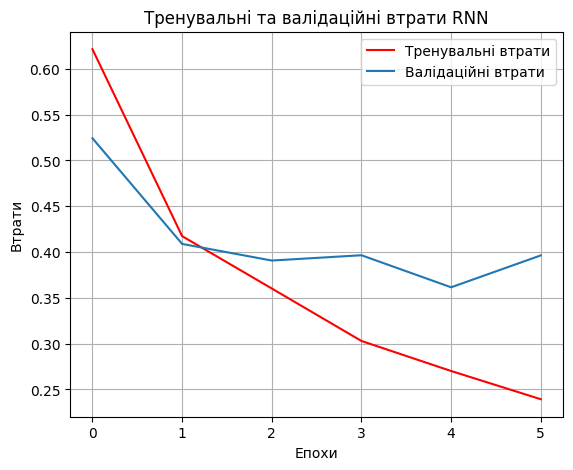

In [9]:
# Візуалізація результатів:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

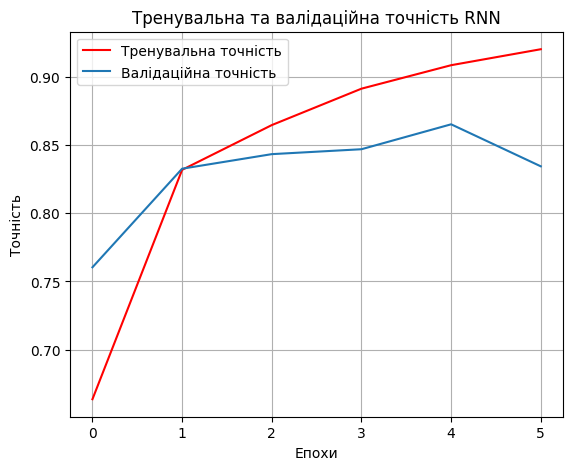

In [10]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [11]:
# Прогнозування з використанням навченої моделі:
predictions = model_rnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_rnn))
print('Тестова точність: {}'.format(test_acc_rnn))

782/782 [==============================] - 32s 41ms/step
Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 34s 43ms/step - loss: 0.3928 - acc: 0.8352
Тестові втрати: 0.39284491539001465
Тестова точність: 0.8352000117301941


### LSTM

In [12]:
from keras.layers import Embedding, LSTM

In [13]:
# Побудова моделі LSTM:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32, input_length=maxlen))
model_lstm.add(LSTM(32))
Dropout(0.1)
model_lstm.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.05)))

In [14]:
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [15]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Навчання моделі:
history = model_lstm.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 14s 84ms/step - loss: 0.7073 - acc: 0.6437 - val_loss: 0.5922 - val_acc: 0.7224
Epoch 2/6
137/137 [==============================] - 9s 69ms/step - loss: 0.4928 - acc: 0.8237 - val_loss: 0.5477 - val_acc: 0.7780
Epoch 3/6
137/137 [==============================] - 8s 58ms/step - loss: 0.4107 - acc: 0.8645 - val_loss: 0.4074 - val_acc: 0.8627
Epoch 4/6
137/137 [==============================] - 8s 57ms/step - loss: 0.3589 - acc: 0.8889 - val_loss: 0.3716 - val_acc: 0.8775
Epoch 5/6
137/137 [==============================] - 7s 49ms/step - loss: 0.3292 - acc: 0.9005 - val_loss: 0.3844 - val_acc: 0.8625
Epoch 6/6
137/137 [==============================] - 6s 46ms/step - loss: 0.3018 - acc: 0.9154 - val_loss: 0.3846 - val_acc: 0.8641


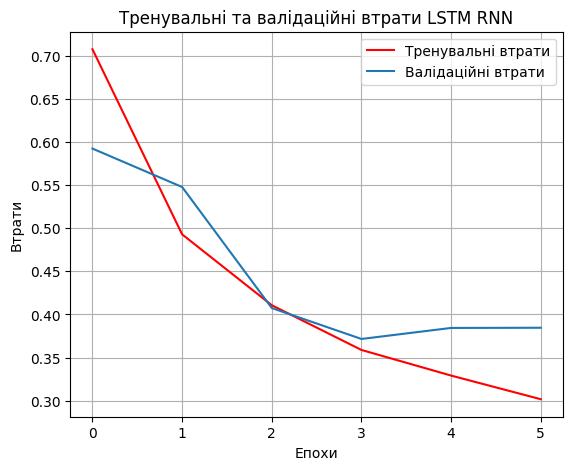

In [17]:
# Візуалізація результатів:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати LSTM RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

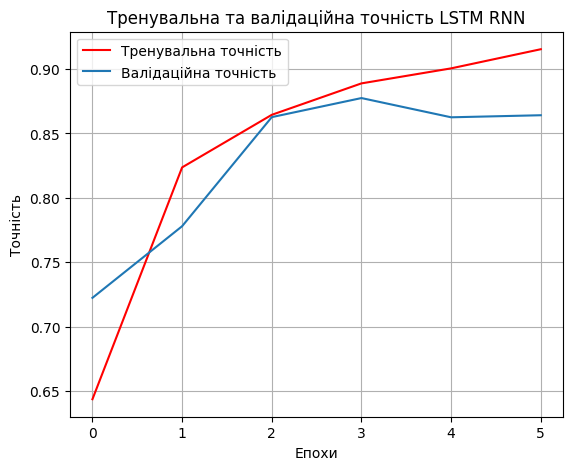

In [18]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність LSTM RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [19]:
# Прогнозування з використанням навченої моделі:
predictions = model_lstm.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_lstm))
print('Тестова точність: {}'.format(test_acc_lstm))

782/782 [==============================] - 7s 9ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 7s 9ms/step - loss: 0.3929 - acc: 0.8602
Тестові втрати: 0.3928678631782532
Тестова точність: 0.8602399826049805


### GRU

In [20]:
from keras.layers import Embedding, GRU

In [21]:
model_gru = Sequential()
model_gru.add(Embedding(max_features, 32, input_length=maxlen))
model_gru.add(GRU(32))
Dropout(0.2)
model_gru.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

In [22]:
model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [23]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Навчання моделі:
history = model_gru.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 13s 84ms/step - loss: 0.6927 - acc: 0.5872 - val_loss: 0.5705 - val_acc: 0.7347
Epoch 2/6
137/137 [==============================] - 10s 70ms/step - loss: 0.4478 - acc: 0.8038 - val_loss: 0.3882 - val_acc: 0.8428
Epoch 3/6
137/137 [==============================] - 9s 63ms/step - loss: 0.3374 - acc: 0.8726 - val_loss: 0.4321 - val_acc: 0.8208
Epoch 4/6
137/137 [==============================] - 7s 52ms/step - loss: 0.2941 - acc: 0.8930 - val_loss: 0.3436 - val_acc: 0.8639
Epoch 5/6
137/137 [==============================] - 5s 39ms/step - loss: 0.2609 - acc: 0.9099 - val_loss: 0.4596 - val_acc: 0.8076
Epoch 6/6
137/137 [==============================] - 5s 40ms/step - loss: 0.2355 - acc: 0.9214 - val_loss: 0.3796 - val_acc: 0.8499


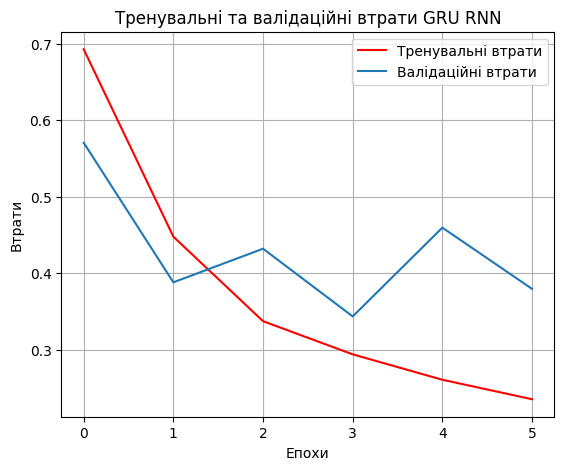

In [25]:
# Візуалізація результатів:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати GRU RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

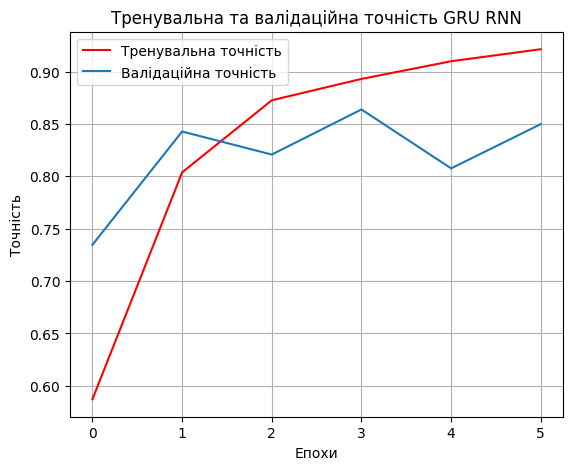

In [26]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність GRU RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [27]:
# Прогнозування з використанням навченої моделі:
predictions = model_gru.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_gru, test_acc_gru = model_gru.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_gru))
print('Тестова точність: {}'.format(test_acc_gru))

782/782 [==============================] - 7s 9ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 7s 9ms/step - loss: 0.3876 - acc: 0.8474
Тестові втрати: 0.3876340091228485
Тестова точність: 0.8474400043487549


### Deep BRNN

In [28]:
from keras.layers import Embedding, Bidirectional, LSTM

In [29]:
# Побудова моделі
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32, input_length=maxlen))
model_brnn.add(Bidirectional(LSTM(32, return_sequences=True)))
model_brnn.add(Bidirectional(LSTM(32)))
Dropout(0.1)
model_brnn.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.1)))

In [30]:
model_brnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [31]:
model_brnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 500, 64)           16640     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Навчання моделі:
history = model_brnn.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 26s 148ms/step - loss: 0.8031 - acc: 0.5642 - val_loss: 0.6229 - val_acc: 0.7417
Epoch 2/6
137/137 [==============================] - 17s 125ms/step - loss: 0.5133 - acc: 0.8014 - val_loss: 0.5006 - val_acc: 0.7847
Epoch 3/6
137/137 [==============================] - 16s 115ms/step - loss: 0.3860 - acc: 0.8713 - val_loss: 0.4427 - val_acc: 0.8304
Epoch 4/6
137/137 [==============================] - 15s 109ms/step - loss: 0.3233 - acc: 0.8968 - val_loss: 0.3615 - val_acc: 0.8715
Epoch 5/6
137/137 [==============================] - 14s 99ms/step - loss: 0.2838 - acc: 0.9169 - val_loss: 0.4820 - val_acc: 0.8251
Epoch 6/6
137/137 [==============================] - 14s 99ms/step - loss: 0.2652 - acc: 0.9255 - val_loss: 0.3612 - val_acc: 0.8751


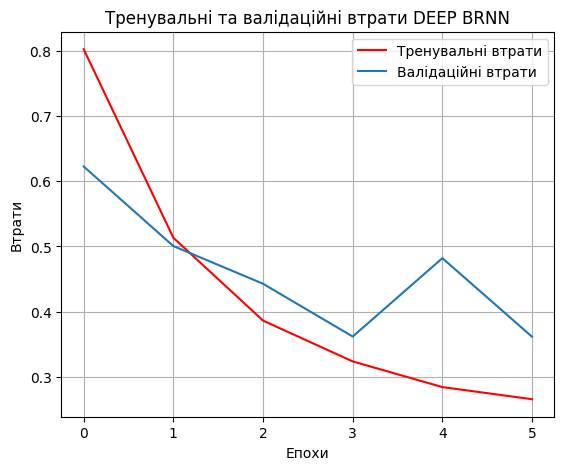

In [33]:
# Візуалізація результатів:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати DEEP BRNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

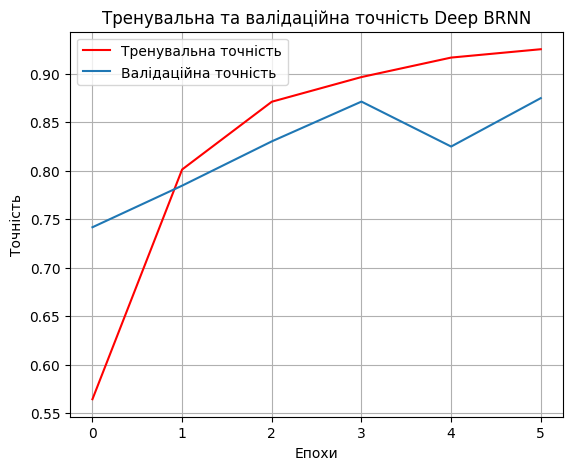

In [34]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність Deep BRNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [35]:
# Прогнозування з використанням навченої моделі:
predictions = model_brnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_brnn, test_acc_brnn = model_brnn.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss_brnn))
print('Тестова точність: {}'.format(test_acc_brnn))

782/782 [==============================] - 25s 30ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 24s 31ms/step - loss: 0.3652 - acc: 0.8720
Тестові втрати: 0.36519166827201843
Тестова точність: 0.8720399737358093


Порівняння результатів точності і втрат

In [36]:
results = {
    "SimpleRNN": {"test_loss": test_loss_rnn, "test_accuracy": test_acc_rnn},
    "LSTM  RNN": {"test_loss": test_loss_lstm, "test_accuracy": test_acc_lstm},
    "GRU   RNN": {"test_loss": test_loss_gru, "test_accuracy": test_acc_gru},
    "Bidir RNN": {"test_loss": test_loss_brnn, "test_accuracy": test_acc_brnn}
}

print("Модель\t\t  Тестова точність   Тестові втрати")
for model_name, metrics in results.items():
    print(f"{model_name}\t\t{metrics['test_accuracy']:.4f}\t\t{metrics['test_loss']:.4f}")


Модель		  Тестова точність   Тестові втрати
SimpleRNN		0.8352		0.3928
LSTM  RNN		0.8602		0.3929
GRU   RNN		0.8474		0.3876
Bidir RNN		0.8720		0.3652


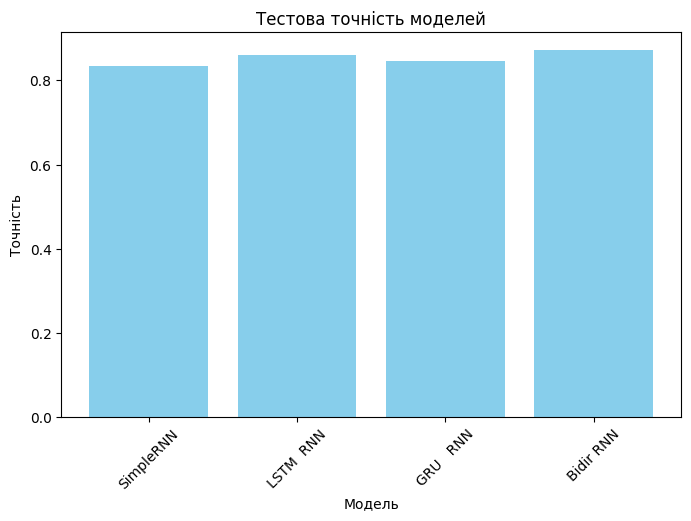

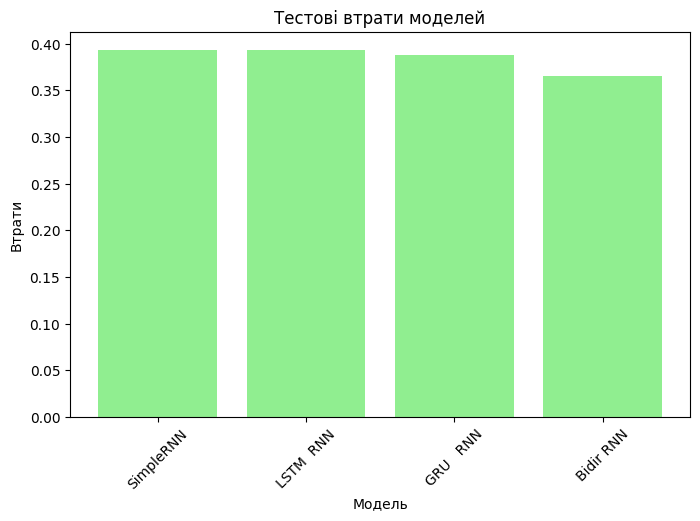

In [37]:
# Візуалізація результатів:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [metrics['test_accuracy'] for metrics in results.values()], color='skyblue')
plt.title('Тестова точність моделей')
plt.ylabel('Точність')
plt.xlabel('Модель')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [metrics['test_loss'] for metrics in results.values()], color='lightgreen')
plt.title('Тестові втрати моделей')
plt.ylabel('Втрати')
plt.xlabel('Модель')
plt.xticks(rotation=45)
plt.show()

В даній роботі було побудовано 4 типи рекурентних нейронних мереж. Для кожної з них було застосовано мінімальну архітектуру шарів додаваючи регуляризація L2 та Dropout, так як на кожному тренуванні було явне перенавчання. Кількість епох на кожному тренуванні становила 6 та розмір бачу 128.

Порівнюючи дані моделі можна сказати, що найбільш точною на тестовому датасеті виявилась Глибока Bidirectional RNN з точністю 87%, а найменш точною Звичайна RNN, яка показала лише 83% точності.

Щодо порівнянь функції втрат, то найменші втрати показала Глибока Bidirectional RNN 0,36. Інші моделі показали майже одинаковий результат.

Отже, можна зробити висновок, що найкраще себе показала Глибока Bidirectional RNN.
